In [18]:
# Importando os módulos que serão utilizados

import tensorflow as tf
import numpy as np
import tensorflow.keras as keras
import matplotlib.pyplot as plt
import time
import dill
import pandas as pd
import plotly.express as ply_exp
import plotly.graph_objects as ply_go

# Configurando o acesso do tensorflow aos processadores do computador
# no caso, está sendo selecionada a primeira placa de vídeo listada

# gpus = tf.config.experimental.list_physical_devices('GPU') # Listando as placas de vídeo
# tf.config.experimental.set_memory_growth(gpus[0], True)    # Selecionando a primeira GPU e configurando

# Importando os módulos contendo as funções criadas no projeto

from aux_func_V3 import *
import API_Numpy
import API_TensorFlow

In [19]:
def teste_cp(n_cp, Δx):
    f = lambda x: (x**(n_cp+1))*np.exp(0.75*x)
#     f = lambda x: np.exp(-20*x**2)
#     f = lambda x: np.sin(np.pi*x) #-0.5*x**3 + np.where(x > 0, 1, 0)
    x = np.arange(-1-3*Δx, 1+3*Δx, Δx, dtype = dtype)
    
    return f(x)

def ref_cp(n_cp, Δx):
    df = lambda x: (n_cp+1)*(x**n_cp)*np.exp(0.75*x) + 0.75*(x**(n_cp+1))*np.exp(0.75*x)
#     df = lambda x: -40*x*np.exp(-20*x**2)
#     df = lambda x: np.pi*np.cos(np.pi*x) #-1.5*x**2
    x  = np.arange(-1-3*Δx, 1+3*Δx, Δx, dtype = dtype)
    
    return df(x)

In [20]:
# nomes = [
#     "WENO-JS", "WENO-JS (M)", "WENO-JS (MS)", "WENO-JS (BI)",
#     "WENO-Z" , "WENO-Z (M)" , "WENO-Z (MS)" , "WENO-Z (BI)" , 
#     "WENO-Z+", "WENO-Z+ (M)", "WENO-Z+ (MS)", "WENO-Z+ (BI)",
#     "WENO-ZC (M)", "WENO-ZC (MS)", "WENO-ZC (BI)"
# ]

# Ordem de convergência para os métodos clássicos
# nomes = [
#     "WENO-JS", "WENO-JS (M)", "WENO-Z"
# ]

# API      = API_Numpy
# equation = diff_equation
# γ        = 1.4

# WENOs = {}

# WENOs[nomes[ 0]] = WENO_JS(   API, equation, γ=γ).DerivadaEspacial
# WENOs[nomes[ 1]] = WENO_JS_M( API, equation, γ=γ).DerivadaEspacial
# WENOs[nomes[ 2]] = WENO_JS_MS(API, equation, γ=γ).DerivadaEspacial
# WENOs[nomes[ 3]] = WENO_JS_BI(API, equation, γ=γ).DerivadaEspacial

# WENOs[nomes[ 4]] = WENO_Z(   API, equation, γ=γ).DerivadaEspacial
# WENOs[nomes[ 5]] = WENO_Z_M( API, equation, γ=γ).DerivadaEspacial
# WENOs[nomes[ 6]] = WENO_Z_MS(API, equation, γ=γ).DerivadaEspacial
# WENOs[nomes[ 7]] = WENO_Z_BI(API, equation, γ=γ).DerivadaEspacial

# WENOs[nomes[ 8]] = WENO_Zp(   API, equation, γ=γ).DerivadaEspacial
# WENOs[nomes[ 9]] = WENO_Zp_M( API, equation, γ=γ).DerivadaEspacial
# WENOs[nomes[10]] = WENO_Zp_MS(API, equation, γ=γ).DerivadaEspacial
# WENOs[nomes[11]] = WENO_Zp_BI(API, equation, γ=γ).DerivadaEspacial

# WENOs[nomes[12]] = WENO_ZC_M( API, equation, γ=γ).DerivadaEspacial
# WENOs[nomes[13]] = WENO_ZC_MS(API, equation, γ=γ).DerivadaEspacial
# WENOs[nomes[14]] = WENO_ZC_BI(API, equation, γ=γ).DerivadaEspacial

# Ordem de convergência para os métodos clássicos
# WENOs[nomes[ 0]] = WENO_JS(   API, equation, γ=γ).DerivadaEspacial
# WENOs[nomes[ 1]] = WENO_JS_M( API, equation, γ=γ).DerivadaEspacial
# WENOs[nomes[ 2]] = WENO_Z(    API, equation, γ=γ).DerivadaEspacial


nomes = [
    "WENO-JS", "WENO-JS (MS)", "WENO-JS (BI)", "WENO-JS (BI2)",
    "WENO-Z" , "WENO-Z (MS)" , "WENO-Z (BI)" , "WENO-Z (BI2)" ,
    "WENO-Z+", "WENO-ZC (MS)", "WENO-ZC (BI)", "WENO-ZC (BI2)",
    "WENO-D" , "WENO-D (MS)" , "WENO-D (BI)" , "WENO-D (BI2)" ,
    "WENO-A" , "WENO-A (MS)" , "WENO-A (BI)" , "WENO-A (BI2)" 
]

API      = API_Numpy
equation = diff_equation
γ        = 1.4

WENOs = {}

WENOs[nomes[ 0]] = simulation(API, equation, WENO_JS_scheme, γ, mapping=null_mapping, map_function=lambda x:x  , network=None, p=2, ε=ε_default).DerivadaEspacial
WENOs[nomes[ 1]] = simulation(API, equation, WENO_JS_scheme, γ, mapping=pre_mapping , map_function=Hong_mapping, network=None, p=2, ε=ε_default).DerivadaEspacial
WENOs[nomes[ 2]] = simulation(API, equation, WENO_JS_scheme, γ, mapping=pre_mapping , map_function=BI_mapping  , network=None, p=2, ε=ε_default).DerivadaEspacial
WENOs[nomes[ 3]] = simulation(API, equation, WENO_JS_scheme, γ, mapping=pre_mapping , map_function=BI2_mapping , network=None, p=2, ε=ε_default).DerivadaEspacial

WENOs[nomes[ 4]] = simulation(API, equation, WENO_Z_scheme, γ, mapping=null_mapping, map_function=lambda x:x  , network=None, p=2, ε=ε_default).DerivadaEspacial
WENOs[nomes[ 5]] = simulation(API, equation, WENO_Z_scheme, γ, mapping=pre_mapping , map_function=Hong_mapping, network=None, p=2, ε=ε_default).DerivadaEspacial
WENOs[nomes[ 6]] = simulation(API, equation, WENO_Z_scheme, γ, mapping=pre_mapping , map_function=BI_mapping  , network=None, p=2, ε=ε_default).DerivadaEspacial
WENOs[nomes[ 7]] = simulation(API, equation, WENO_Z_scheme, γ, mapping=pre_mapping , map_function=BI2_mapping , network=None, p=2, ε=ε_default).DerivadaEspacial

WENOs[nomes[ 8]] = simulation(API, equation, WENO_ZC_scheme, γ, mapping=null_mapping   , map_function=lambda x:x  , network=None, p=2, ε=ε_default).DerivadaEspacial
WENOs[nomes[ 9]] = simulation(API, equation, WENO_ZC_scheme, γ, mapping=pre_inv_mapping, map_function=Hong_mapping, network=None, p=2, ε=ε_default).DerivadaEspacial
WENOs[nomes[10]] = simulation(API, equation, WENO_ZC_scheme, γ, mapping=pre_inv_mapping, map_function=BI_mapping  , network=None, p=2, ε=ε_default).DerivadaEspacial
WENOs[nomes[11]] = simulation(API, equation, WENO_ZC_scheme, γ, mapping=pre_inv_mapping, map_function=BI2_mapping , network=None, p=2, ε=ε_default).DerivadaEspacial

WENOs[nomes[12]] = simulation(API, equation, WENO_D_scheme, γ, mapping=null_mapping   , map_function=lambda x:x  , network=None, p=2, ε=ε_default).DerivadaEspacial
WENOs[nomes[13]] = simulation(API, equation, WENO_D_scheme, γ, mapping=pre_inv_mapping, map_function=Hong_mapping, network=None, p=2, ε=ε_default).DerivadaEspacial
WENOs[nomes[14]] = simulation(API, equation, WENO_D_scheme, γ, mapping=pre_inv_mapping, map_function=BI_mapping  , network=None, p=2, ε=ε_default).DerivadaEspacial
WENOs[nomes[15]] = simulation(API, equation, WENO_D_scheme, γ, mapping=pre_inv_mapping, map_function=BI2_mapping , network=None, p=2, ε=ε_default).DerivadaEspacial

WENOs[nomes[16]] = simulation(API, equation, WENO_A_scheme, γ, mapping=null_mapping   , map_function=lambda x:x  , network=None, p=2, ε=ε_default).DerivadaEspacial
WENOs[nomes[17]] = simulation(API, equation, WENO_A_scheme, γ, mapping=pre_inv_mapping, map_function=Hong_mapping, network=None, p=2, ε=ε_default).DerivadaEspacial
WENOs[nomes[18]] = simulation(API, equation, WENO_A_scheme, γ, mapping=pre_inv_mapping, map_function=BI_mapping  , network=None, p=2, ε=ε_default).DerivadaEspacial
WENOs[nomes[19]] = simulation(API, equation, WENO_A_scheme, γ, mapping=pre_inv_mapping, map_function=BI2_mapping , network=None, p=2, ε=ε_default).DerivadaEspacial

# nomes = ["Linear"]

# API      = API_Numpy
# equation = diff_equation
# γ        = 1.4

# WENOs = {}

# WENOs[nomes[ 0]] = simulation(API, equation, WENO_linear_scheme, γ, mapping=null_mapping, map_function=lambda x:x  , network=None, p=2, ε=ε_default).DerivadaEspacial


In [35]:
# base = 0.5
# Δxs  = 2/20*base**np.arange(0, 10+1)
# Δxs  = 2/160*base**np.arange(0, 10+1)
# malha = [2/160, 2/320, 2/640, 2/1280, 2/2560, 2/5120, 2/10240, 2/20480]

Δxs  = [2/60, 2/80, 2/100, 2/120, 2/141, 2/160, 2/180]
base = np.zeros([len(Δxs)-1])
for i in np.arange(len(base)):
    base[i] = Δxs[i+1]/Δxs[i]

fronteira = FronteiraFixa
n_cp = 3

testes    = {}
derivadas = {}
erros     = {}
for nome in nomes:
    
    resultados = []
    derivada   = []
    erro       = []
    for Δx in Δxs:
        u     = teste_cp(n_cp, Δx)
        u_hat = WENOs[nome](u, Δx, fronteira, t=None)
        dif   = u_hat - ref_cp(n_cp, Δx)
        
#         resultados.append(np.max(np.abs(dif[3:-3])))             # norma L-inf
        resultados.append(np.sqrt(np.sum(np.square(dif[3:-3])))) # norma L2
#         resultados.append((np.sum(np.abs(dif[3:-3])))            # norma L1
        
        derivada.append(u_hat)
        erro.append(dif[3:-3])
        
    testes[nome]    = resultados
    derivadas[nome] = derivada
    erros[nome]     = erro

In [27]:
aux_nome = "WENO-Z"

aux_x = Δxs
aux_y = erros[aux_nome]

# x     = tf.range(-1-3*aux_x[0], 1+3*aux_x[0], aux_x[0], dtype = dtype)
# y     = aux_y[0]
# label = tf.repeat([2/Δxs[0]], [len(aux_y[0])])

# for i in tf.range(1, len(aux_x)):
#     x = tf.concat([x, tf.range(-1-3*aux_x[i], 1+3*aux_x[i], aux_x[i], dtype = dtype)], axis = 0)
#     y = tf.concat([y, aux_y[i]], axis = 0)
#     label = tf.concat([label, tf.repeat([2/Δxs[i]], [len(aux_y[i])])], axis = 0)

x     = tf.range(-1, 1, aux_x[0], dtype = dtype)
y     = aux_y[0]
label = tf.repeat([2/Δxs[0]], [len(aux_y[0])])

for i in tf.range(1, len(aux_x)):
    x = tf.concat([x, tf.range(-1, 1, aux_x[i], dtype = dtype)], axis = 0)
    y = tf.concat([y, aux_y[i]], axis = 0)
    label = tf.concat([label, tf.repeat([2/Δxs[i]], [len(aux_y[i])])], axis = 0)

df = pd.DataFrame(
    {
        "x"     : x     ,
        "y"     : y     ,
        "label" : label
    }
)

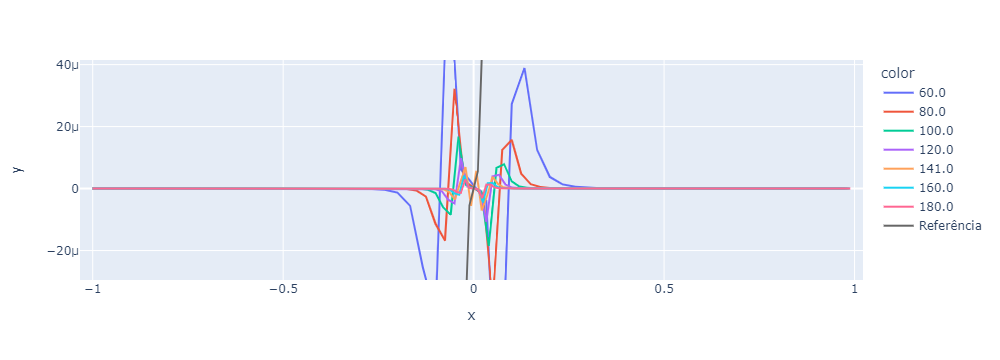

In [44]:
fig = ply_exp.line(
    data_frame = df    ,
    x          = x     ,
    y          = y     ,
    color      = label
)
fig.add_trace(
    ply_go.Scatter(
        x    = tf.range(-1-3*aux_x[len(Δxs)-1], 1+3*aux_x[len(Δxs)-1], aux_x[len(Δxs)-1], dtype = dtype),
        y    = ref_cp(n_cp, aux_x[len(Δxs)-1]) , # u_ref, 
        mode = "lines"                                           ,
        line = ply_go.scatter.Line(color="#666666")              ,
        name = "Referência"
    )
)
fig.show()

In [ ]:
fig.write_html("C:/Users/daniw/OneDrive/Documentos/GitHub/Top_mat_A/WENO-BI/ordem_de_convergência_gausiana.html")

In [36]:
testes

{'WENO-JS': [0.00012459770232297243,
  5.2424028634008066e-05,
  2.6808118012373055e-05,
  1.550364059951674e-05,
  1.3677780078542789e-05,
  6.536286207771197e-06,
  4.589827326031286e-06],
 'WENO-JS (MS)': [0.00010061584379775569,
  4.205276102603581e-05,
  2.1436480983178812e-05,
  1.2375491674703924e-05,
  1.4313562024716588e-05,
  5.208328430393938e-06,
  3.6555851250725474e-06],
 'WENO-JS (BI)': [0.0002129637052936068,
  8.719130170076863e-05,
  4.411297357560548e-05,
  2.5347545776478126e-05,
  1.5460309839427255e-05,
  1.0624211547631496e-05,
  7.443981987824957e-06],
 'WENO-JS (BI2)': [0.00036557557689783916,
  0.0001521444455365125,
  7.745295252829154e-05,
  4.4674589075321955e-05,
  2.6085038348747495e-05,
  1.8790010792567467e-05,
  1.3184286307688965e-05],
 'WENO-Z': [0.00013500207833332649,
  5.684894495145226e-05,
  2.9081609219001155e-05,
  1.6821566924572036e-05,
  1.4094704496788618e-05,
  7.092974057721986e-06,
  4.980847272172862e-06],
 'WENO-Z (MS)': [9.5832147455

In [37]:
ordem = {}
for nome in nomes:
    l_dif  = np.zeros(len(base))
    for i in np.arange(len(base)):
        l_dif[i] = np.log(testes[nome][i+1])/np.log(base[i])-np.log(testes[nome][i])/np.log(base[i])
    ordem[nome] = l_dif

In [38]:
ordem

{'WENO-JS': array([3.00931202, 3.00551054, 3.00364855, 0.77698077, 5.84115618,
        3.00150816]),
 'WENO-JS (MS)': array([ 3.0324611 ,  3.01971915,  3.01322652, -0.90215857,  7.9971294 ,
         3.00554994]),
 'WENO-JS (BI)': array([3.10418084, 3.05341851, 3.03898246, 3.06573762, 2.96755741,
        3.02021071]),
 'WENO-JS (BI2)': array([3.04726206, 3.02567418, 3.01810622, 3.33632502, 2.59493975,
        3.0080707 ]),
 'WENO-Z': array([3.00641783, 3.00385859, 3.00263002, 1.09669921, 5.43211071,
        3.00132113]),
 'WENO-Z (MS)': array([ 3.03702002,  3.02374192,  3.01742437, -1.27646514,  8.48579371,
         3.01128977]),
 'WENO-Z (BI)': array([ 3.13230714,  3.11879411,  3.10276916, -0.30486136,  7.37043841,
         3.06840653]),
 'WENO-Z (BI2)': array([ 3.08969707,  3.07866962,  3.0650368 ,  5.50359365, -0.08673965,
         3.04211967]),
 'WENO-Z+': array([3.00629628, 3.00381112, 3.00261224, 1.09724583, 5.43145189,
        3.00137662]),
 'WENO-ZC (MS)': array([ 3.03516018,  3

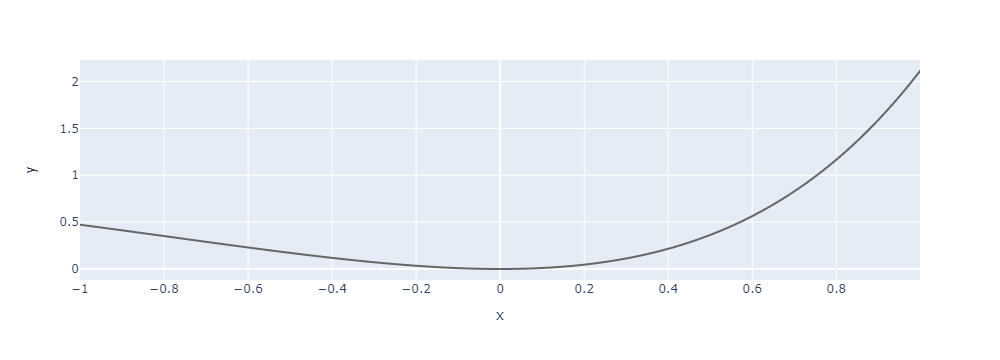

In [13]:
x = np.arange(-1, 1, 0.001)
y = teste_cp(1, 0.001)[3:-3]

df = pd.DataFrame(
    {
        "x": x,
        "y": y
    }
)
fig = ply_exp.line(
    data_frame = df,
    x          = x ,
    y          = y ,
    color_discrete_sequence = ["#666666"]
)
fig.show()
fig.update_yaxes(exponentformat="power")
fig.write_html("htmls\Função com Ponto Crítico de Ordem 1.html")